In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://data.cityofnewyork.us/resource/6fi9-q3ta.csv?$limit=500000"
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['hour_beginning'])

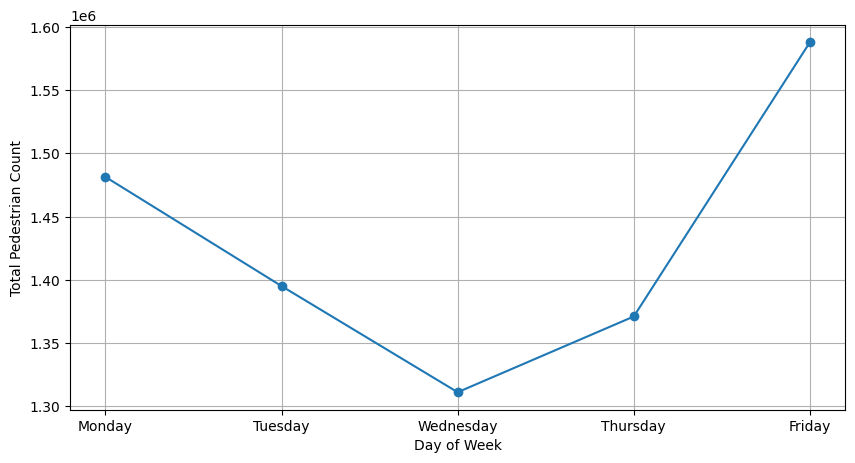

In [3]:
df['day_of_week'] = df['date'].dt.day_name()
weekday_df = df[df['day_of_week'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]

weekday_counts = weekday_df.groupby('day_of_week')['pedestrians'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday']
)

plt.figure(figsize=(10,5))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o')
plt.xlabel("Day of Week")
plt.ylabel("Total Pedestrian Count")
plt.grid(True)
plt.show()

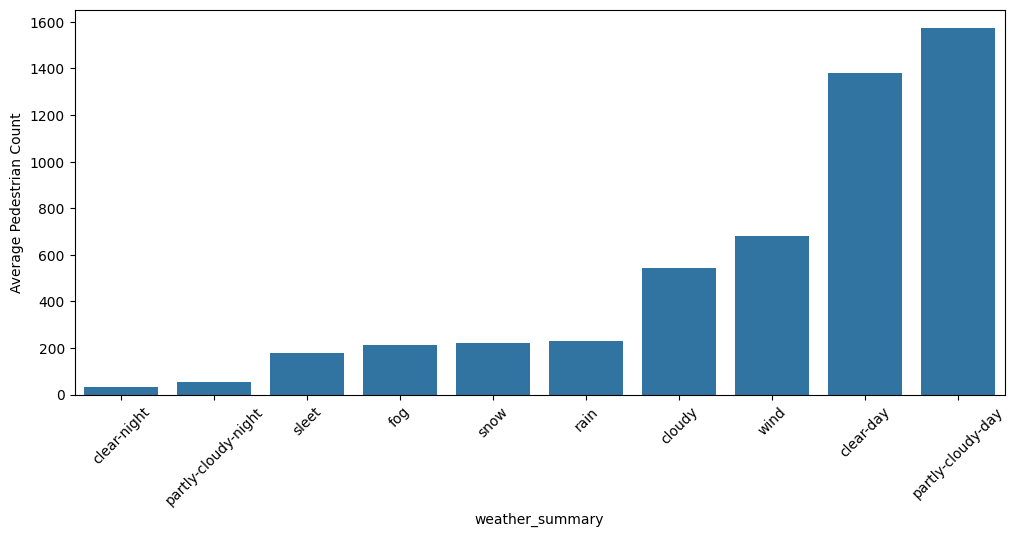

In [5]:
df_2019 = df[df['date'].dt.year == 2019]

weather_counts = df_2019.groupby('weather_summary')['pedestrians'].mean().sort_values()

plt.figure(figsize=(12,5))
sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.xticks(rotation=45)
plt.ylabel("Average Pedestrian Count")
plt.show()

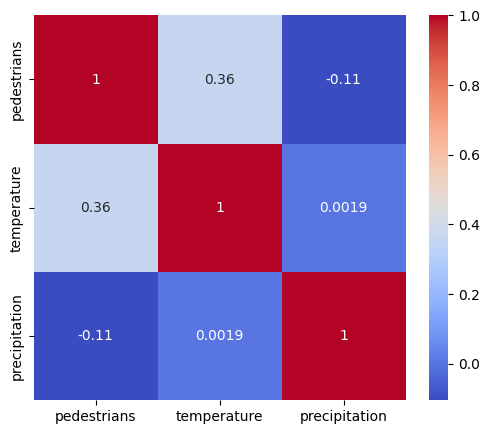

In [6]:
corr_columns = ['pedestrians','temperature','precipitation']
corr_df = df_2019[corr_columns].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.show()

In [7]:
df['hour'] = df['date'].dt.hour

def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['time_of_day'] = df['hour'].apply(categorize_time)

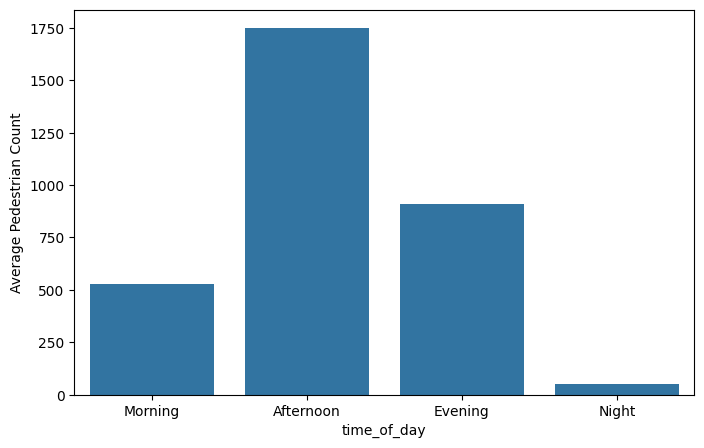

In [8]:
tod_counts = df.groupby('time_of_day')['pedestrians'].mean().reindex(
    ['Morning','Afternoon','Evening','Night']
)

plt.figure(figsize=(8,5))
sns.barplot(x=tod_counts.index, y=tod_counts.values)
plt.ylabel("Average Pedestrian Count")
plt.show()